In [34]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("training_cleaned.csv", skipinitialspace=True, sep=',')
df.head()

,VehicleAge,VehOdo,VNZIP1,WarrantyCost,Auction,Make,Size,IsOnlineSale,TopThreeAmericanName,VNST,Trim,Color,WheelType,Nationality,Transmission,IsBadBuy,MMR_factor_n,VehBCost_n
0,2,61184,33619,533,ADESA,KIA,MEDIUM,0,OTHER,FL,EX,BLUE,Covers,OTHER ASIAN,AUTO,1,0.228606,0.167169
1,3,92383,32124,1630,MANHEIM,DODGE,MEDIUM,0,CHRYSLER,FL,SXT,SILVER,Covers,AMERICAN,AUTO,0,0.170015,0.109610
2,2,45965,74135,693,OTHER,DODGE,MEDIUM,0,CHRYSLER,OK,SE,BLACK,Covers,AMERICAN,AUTO,0,0.253618,0.205542
3,4,80169,85018,1633,OTHER,FORD,VAN,0,FORD,AZ,S,BROWN,Covers,AMERICAN,AUTO,0,0.163639,0.129481
4,4,77372,75236,1623,MANHEIM,CHRYSLER,VAN,0,CHRYSLER,TX,Bas,BLUE,Alloy,AMERICAN,AUTO,0,0.172436,0.155383


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 18 columns):
VehicleAge              58386 non-null int64
VehOdo                  58386 non-null int64
VNZIP1                  58386 non-null int64
WarrantyCost            58386 non-null int64
Auction                 58386 non-null object
Make                    58386 non-null object
Size                    58386 non-null object
IsOnlineSale            58386 non-null int64
TopThreeAmericanName    58386 non-null object
VNST                    58386 non-null object
Trim                    58386 non-null object
Color                   58386 non-null object
WheelType               58386 non-null object
Nationality             58386 non-null object
Transmission            58386 non-null object
IsBadBuy                58386 non-null int64
MMR_factor_n            58386 non-null float64
VehBCost_n              58386 non-null float64
dtypes: float64(2), int64(6), object(10)
memory usage: 8.0+ MB


In [14]:
df['IsBadBuy'].unique()

array([1, 0], dtype=int64)

#### Classification : 

In [15]:
#train and test for the cross validation before validating the model and test it with the real test.csv


In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)

In [67]:
attributes = [col for col in num_df.columns if col != 'IsBadBuy']
# attributes = df.drop(['class'], axis=1).values

X = num_df[attributes].values
y = num_df['IsBadBuy']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

Decision Trees

In [68]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, 
                             min_samples_split=2, 
                             min_samples_leaf=1)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

VehicleAge 0.22185890718265686
VehOdo 0.1652272974456989
VNZIP1 0.12172016733307481
WarrantyCost 0.11012175094203841
IsOnlineSale 0.002237705672546608
MMR_factor_n 0.1755153000319507
VehBCost_n 0.20331887139203378


In [70]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [55]:
#dot_data = tree.export_graphviz(clf, out_file=None,  feature_names=attributes, class_names=clf.classes_,  
#                                filled=True, rounded=True,  special_characters=True)  
#graph = pydotplus.graph_from_dot_data(dot_data)  
#Image(graph.create_png())

In [71]:
y_pred = clf.predict(X_train)

In [72]:
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))

Accuracy 0.8867384389527772
F1-score [0.93906725 0.19788598]


In [73]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     35824
           1       0.79      0.11      0.20      5046

    accuracy                           0.89     40870
   macro avg       0.84      0.55      0.57     40870
weighted avg       0.88      0.89      0.85     40870



In [74]:
confusion_matrix(y_train, y_pred)

array([[35670,   154],
       [ 4475,   571]], dtype=int64)

In [75]:
y_pred = clf.predict(X_test)

In [76]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

Accuracy 0.8686914820735328
F1-score [0.9293525  0.07108239]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     15354
           1       0.28      0.04      0.07      2162

    accuracy                           0.87     17516
   macro avg       0.58      0.51      0.50     17516
weighted avg       0.81      0.87      0.82     17516



array([[15128,   226],
       [ 2074,    88]], dtype=int64)

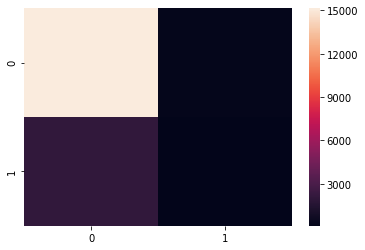

In [77]:
import seaborn as sns
sns.heatmap(conf_matrix)

###### Cross Valid

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8705 (+/- 0.00)
F1-score: 0.4914 (+/- 0.01)


In [80]:
scores = cross_val_score(clf, X, y, cv=100)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X, y, cv=100, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8705 (+/- 0.01)
F1-score: 0.4923 (+/- 0.04)
